# Дисперсионный анализ

In [27]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
m = [22, 18, 16, 19, 25]
sigma = 3

In [86]:
groups = np.zeros((6, 5))
for i in range(5):
    groups[:, i] = np.random.normal(m[i], sigma, (6,)).round()

In [87]:
dataframe = pd.DataFrame(groups, columns=['group_1', 'group_2', 'group_3', 'group_4', 'group_5'])

In [88]:
print(dataframe)

   group_1  group_2  group_3  group_4  group_5
0     22.0     21.0     13.0     22.0     27.0
1     20.0     13.0     16.0     20.0     28.0
2     24.0     19.0     21.0     20.0     30.0
3     20.0     15.0     15.0     21.0     27.0
4     25.0     19.0     19.0     26.0     26.0
5     19.0     15.0     13.0     18.0     25.0


Проверим выборки на независимость с помощью критерия $\chi^2$ Пирсона.

Выдвенем следующие гипотезы:

- H0: выборки независимы;
- H1: выборки не являются независимыми.

Примем уровень значимости  $\alpha = 0.05$.

In [89]:
_, p, _, _ = st.chi2_contingency(dataframe, correction=False)
print('p-value:', p)

alpha = 0.05
if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.9998191049325926
Нулевая гипотеза принимается


Проверим гипотезу о нормальности распределений

In [90]:
dim = dataframe.T.shape[0]

for i in range(dim):
    _, p = st.shapiro(dataframe.T.values[i])
    
    alpha = 0.01
    if p >= alpha:
        print(f'Нулевая гипотеза принимается')
    else:
        print(f'Нулевая гипотеза отвергается')

Нулевая гипотеза принимается
Нулевая гипотеза принимается
Нулевая гипотеза принимается
Нулевая гипотеза принимается
Нулевая гипотеза принимается


Проверим гипотезу об однородности дисперсий
$H_0: \sigma_1^2=\sigma_2^2=...=\sigma_k^2$

In [91]:
_, p = st.levene(dataframe.T.values[0], dataframe.T.values[1]
                 , dataframe.T.values[2], dataframe.T.values[3], dataframe.T.values[4])

alpha = 0.05
if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

Нулевая гипотеза принимается


Переходим к дисперсионному анализу

Проверяем гипотезу о равенстве средних $H_0: m_1=m_2=...=m_k$

In [92]:
_, p = st.f_oneway(*dataframe.T.values)
print(f'p-value: {p:.4f}')

alpha = 0.05

if p >= alpha:
    print(f'Нулевая гипотеза принимается')
else:
    print(f'Нулевая гипотеза отвергается')

p-value: 0.0000
Нулевая гипотеза отвергается


Выясним как группы различаются между собой

Воспользуемся критерием Тьюки

In [96]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [95]:
stacked_data = dataframe.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'group',
                                            0:'result'})
stacked_data

,id,group,result
0,0,group_1,22.0
1,0,group_2,21.0
2,0,group_3,13.0
3,0,group_4,22.0
4,0,group_5,27.0
5,1,group_1,20.0
6,1,group_2,13.0
7,1,group_3,16.0
8,1,group_4,20.0
9,1,group_5,28.0


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
group_1 group_2  -4.6667 0.0439  -9.2398 -0.0935   True
group_1 group_3     -5.5 0.0129 -10.0731 -0.9269   True
group_1 group_4     -0.5    0.9  -5.0731  4.0731  False
group_1 group_5      5.5 0.0129   0.9269 10.0731   True
group_2 group_3  -0.8333    0.9  -5.4065  3.7398  False
group_2 group_4   4.1667 0.0867  -0.4065  8.7398  False
group_2 group_5  10.1667  0.001   5.5935 14.7398   True
group_3 group_4      5.0 0.0272   0.4269  9.5731   True
group_3 group_5     11.0  0.001   6.4269 15.5731   True
group_4 group_5      6.0 0.0059   1.4269 10.5731   True
-------------------------------------------------------


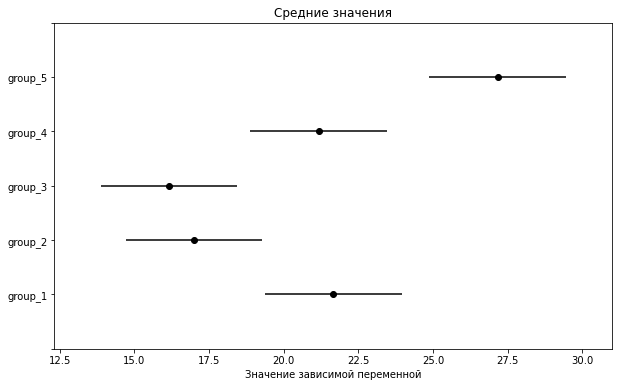

In [97]:
# Создадим экземпляр класса MultiComparison и передадим параметры из stacked_data
MultiComp = MultiComparison(stacked_data['result'], stacked_data['group'])
# вычислим значение критерия Тьюки с уровнем значимости 0.05
alpha = 0.05
results = MultiComp.tukeyhsd(alpha)

# результат
print(results.summary())
# визуализируем
fig = results.plot_simultaneous(xlabel='Значение зависимой переменной')
fig.get_axes()[0].title.set_text('Средние значения')

В полученной таблице приведены результаты попарной проверки гипотез о равенстве средних. Значение True в столбце reject соответсвует случаю, когда гипотеза отвергается.